In [2]:
#라이브러리 임포트 

%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

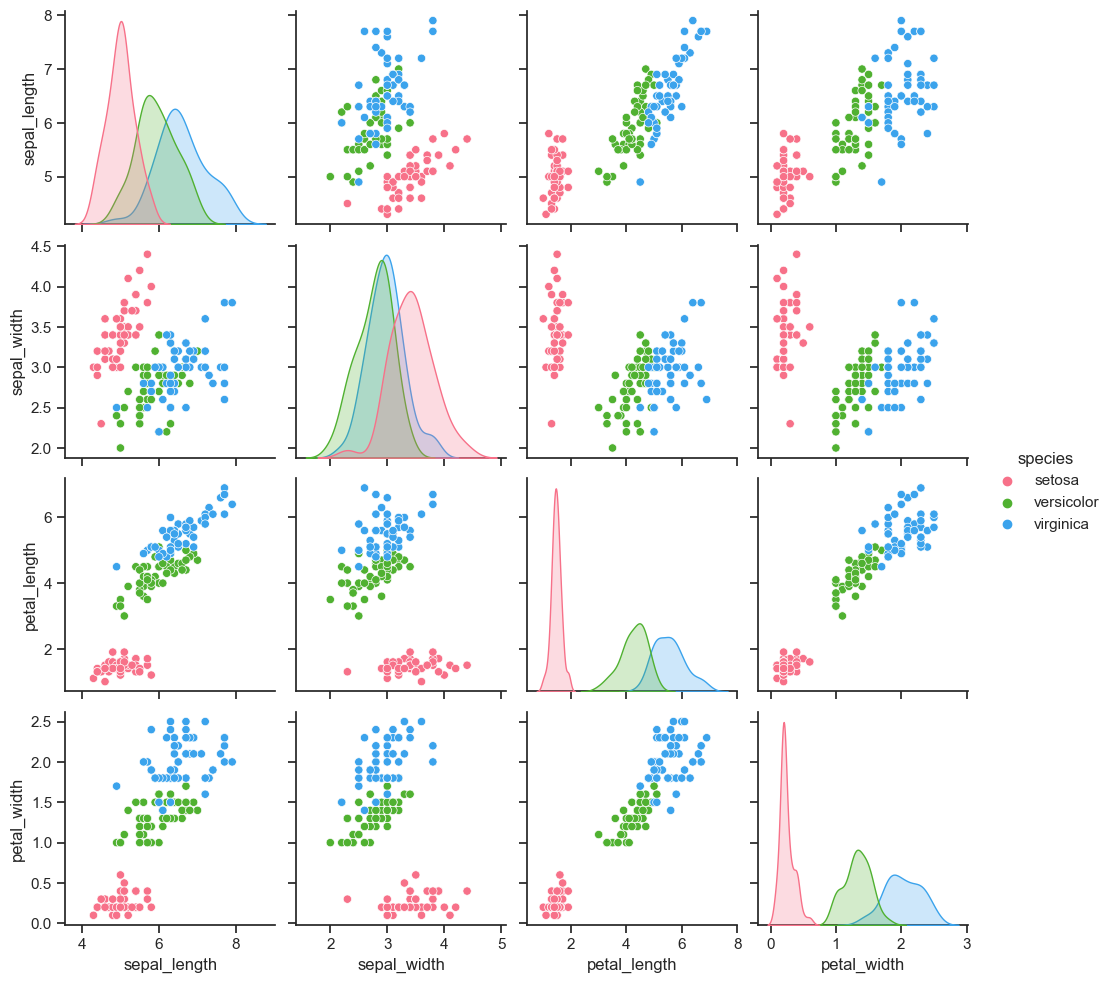

In [3]:
sns.set(style='ticks' , color_codes = True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species" , palette="husl")

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values


# 원 핫 인코딩
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y


array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,
                                                    random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((120, 4), (30, 4), (120, 3), (30, 3))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu' ))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
hist = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100)


Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 1.3665 - accuracy: 0.3083 - val_loss: 1.1286 - val_accuracy: 0.4333
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1952 - accuracy: 0.3083 - val_loss: 1.0522 - val_accuracy: 0.4333
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0834 - accuracy: 0.4417 - val_loss: 1.0064 - val_accuracy: 0.7667
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9923 - accuracy: 0.6667 - val_loss: 0.9598 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9355 - accuracy: 0.6917 - val_loss: 0.9197 - val_accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8955 - accuracy: 0.6917 - val_loss: 0.8895 - val_accuracy: 0.5667
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8601 - accuracy: 0.6917 - val_loss: 0.8521 - val_accuracy: 0.5667
Epoch 8/100
4/4 [=========

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

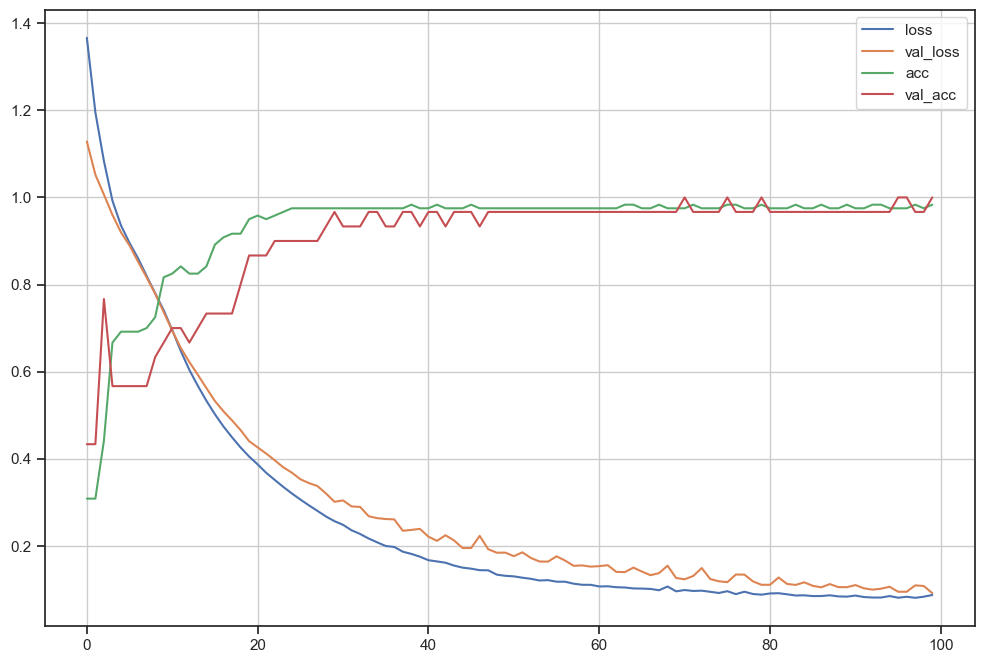

In [13]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.legend(['loss','val_loss','acc','val_acc'])
plt.grid()
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test,y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 23ms/step - loss: 0.0913 - accuracy: 1.0000
Accuracy = 1.00
